# #ML-Mini-1 : Advertisement Sale Prediction using Logistic Regression

------------------------------------------------------------------------------------------------------------------------
This is to Make Predictions regarding Sales of an Advertisement from an Existing Customers by making use of Logistic Regression.

The Dataset used in this Model tells about whether a person of certain age having certain income purchases a product or not.

And hence, we can use it to predict whether a targeted audience will purchase the product or not.

------------------------------------------------------------------------------------------------------------------------

### 1 - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### 2 - Uploading the Dataset

In [2]:
dts = pd.read_csv("Social_Network_Ads.csv")
dts

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### 3 - Inspecting the Dataset

In [3]:
dts.shape

(400, 3)

In [4]:
dts.columns

Index(['Age', 'Salary', 'Purchased'], dtype='object')

In [5]:
dts.head(5)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### 4  - Segregating Dataset into X [ Input / Independant Variable ] & Y [ Output / Dependant Variable ]

In [6]:
X = dts.iloc[:, :-1].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [7]:
Y = dts.iloc[:, -1].values
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### 5 - Splitting Dataset to Test & Train

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

### 6 - Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

### 7 - Training our Model

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

### 8 - Plotting Our Regression Curves

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

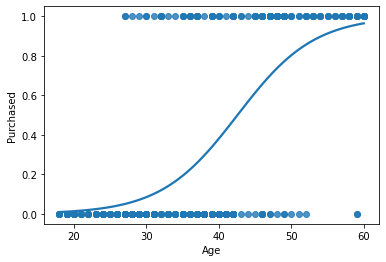

In [11]:
sns.regplot(x='Age',y='Purchased',data=dts,logistic=True,ci=None)

<AxesSubplot:xlabel='Salary', ylabel='Purchased'>

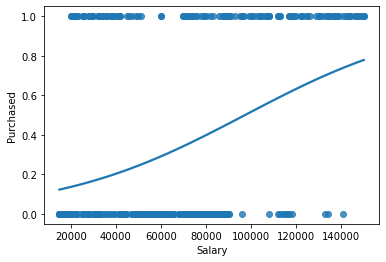

In [12]:
sns.regplot(x='Salary',y='Purchased',data=dts,logistic=True,ci=None)

### 9 - Predicting whether the New Customer with Age & Salary will Buy or Not

In [13]:
age = int(input("Enter New Customer's Age : "))
sal = int(input("Enter New Customer's Salary : "))
newCust = [[age,sal]]
result = model.predict(sc.transform(newCust))
print(result)
if result==1:
    print("The Customer will Buy!")
else:
    print("The Customer won't Buy!")

Enter New Customer's Age : 40
Enter New Customer's Salary : 67890
[0]
The Customer won't Buy!


### 10 - Prediction Results for all Test Data

In [14]:
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score as acc, precision_score as pcs, recall_score as rcs
cm = confusion_matrix(Y_test,Y_pred)

print("Confusion Matrix : ")
print(cm)

print("\nAccuracy of the Model : {0}%".format(acc(Y_test,Y_pred)*100))

Confusion Matrix : 
[[65  3]
 [ 8 24]]

Accuracy of the Model : 89.0%


In [16]:
print("Recall of the Model : ",rcs(Y_test,Y_pred))
print("\nPrecision of the Model : ",pcs(Y_test,Y_pred))

Recall of the Model :  0.75

Precision of the Model :  0.8888888888888888


-------------------------------------------------------------------------------------------------------------------------------